# Image Classification by AMINA SAEED

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical



In [3]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Define the indices for cats and dogs
cat_index = 3
dog_index = 5



In [4]:
# Filter data to only include cats and dogs
train_filter = (y_train.flatten() == cat_index) | (y_train.flatten() == dog_index)
test_filter = (y_test.flatten() == cat_index) | (y_test.flatten() == dog_index)

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Map labels to binary (0 for cats, 1 for dogs)
y_train = (y_train == dog_index).astype(int)
y_test = (y_test == dog_index).astype(int)



In [5]:
# Normalize pixel values
def normalize(x):
    x = x.astype('float32') / 255.0
    return x

x_train = normalize(x_train)
x_test = normalize(x_test)

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.5, random_state=0)



In [6]:
# Create data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Model definition
weight_decay = 1e-4
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])



C:\Users\PMLS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])



In [8]:
# Number of epochs
num_epochs = 10

# Training the model
training_history = model.fit(datagen.flow(x_train, y_train, batch_size=32), 
                             epochs=num_epochs, 
                             steps_per_epoch=len(x_train) // 32, 
                             validation_data=(x_val, y_val), 
                             verbose=1)



Epoch 1/10


C:\Users\PMLS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


156/156 ━━━━━━━━━━━━━━━━━━━━ 62s 354ms/step - accuracy: 0.5511 - loss: 0.9353 - val_accuracy: 0.5012 - val_loss: 0.7612
Epoch 2/10
  1/156 ━━━━━━━━━━━━━━━━━━━━ 1:02 400ms/step - accuracy: 0.5312 - loss: 0.7514

C:\Users\PMLS\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.5312 - loss: 0.7514 - val_accuracy: 0.5008 - val_loss: 0.7613
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 54s 342ms/step - accuracy: 0.5902 - loss: 0.7241 - val_accuracy: 0.5208 - val_loss: 0.8170
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.5625 - loss: 0.6746 - val_accuracy: 0.5222 - val_loss: 0.8139
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 42s 271ms/step - accuracy: 0.6054 - loss: 0.6931 - val_accuracy: 0.6378 - val_loss: 0.6758
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.6250 - loss: 0.6653 - val_accuracy: 0.6380 - val_loss: 0.6759
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 56s 355ms/step - accuracy: 0.6123 - loss: 0.6959 - val_accuracy: 0.6488 - val_loss: 0.6631
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.7812 - loss: 0.6533 - val_accuracy: 0.6492 - val_loss: 0.6631
Epoch 9/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 45s 288ms/step - accuracy: 0.6349 - loss: 0.6702 - val_accu

In [9]:
# Evaluating the model on the test set
predictions = model.predict(x_test)
true_classes = y_test
predicted_classes = (predictions > 0.5).astype(int)

# Generating the confusion matrix
confusion_mat = confusion_matrix(true_classes, predicted_classes)



63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step


In [10]:
# Creating the classification report
report = classification_report(true_classes, predicted_classes, target_names=['Cat', 'Dog'], output_dict=True)

# Evaluating model performance
evaluation = model.evaluate(x_test, y_test)
print("Test set loss:", evaluation[0])
print("Test set accuracy:", evaluation[1] * 100)


63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.6619 - loss: 0.6562
Test set loss: 0.6538380980491638
Test set accuracy: 65.10000228881836


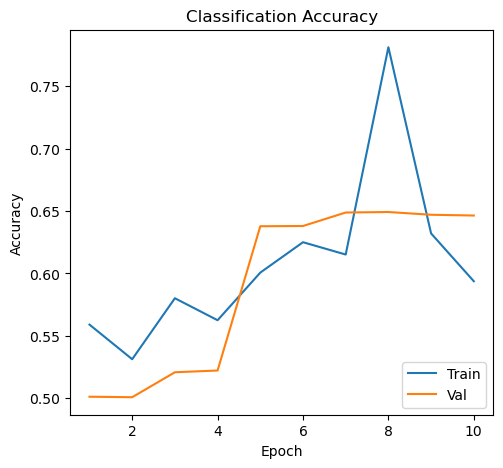

In [11]:

# Plotting accuracy over epochs
epochs = range(1, num_epochs + 1)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_history.history['accuracy'])
plt.plot(epochs, training_history.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')



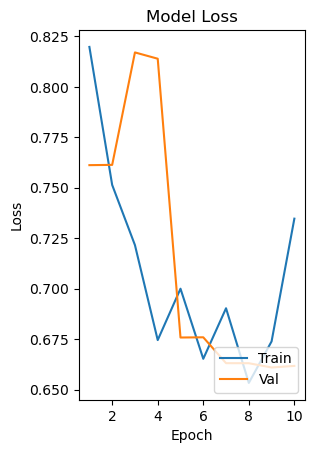

In [12]:
# Plotting loss over epochs
plt.subplot(1, 2, 2)
plt.plot(epochs, training_history.history['loss'])
plt.plot(epochs, training_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()



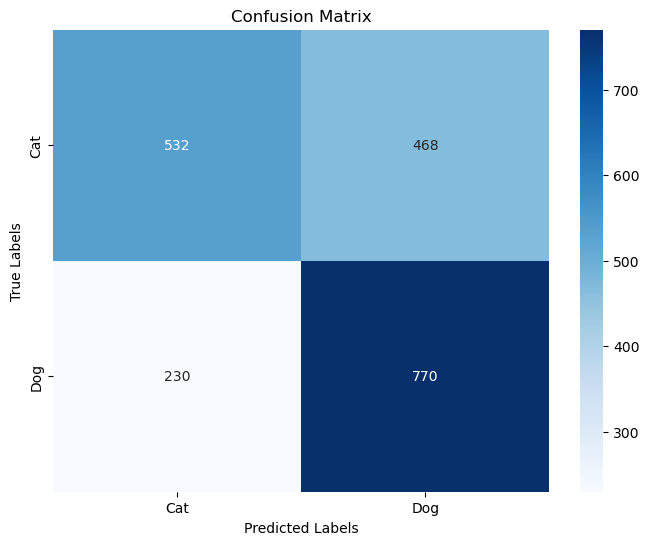

In [13]:
# Plotting the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



In [14]:
# Printing the classification report
report_dataframe = pd.DataFrame(report).transpose()
print("\nClassification Report:")
print(report_dataframe)




Classification Report:
              precision  recall  f1-score   support
Cat            0.698163   0.532  0.603859  1000.000
Dog            0.621971   0.770  0.688114  1000.000
accuracy       0.651000   0.651  0.651000     0.651
macro avg      0.660067   0.651  0.645987  2000.000
weighted avg   0.660067   0.651  0.645987  2000.000


In [15]:
# Printing the model summary
print("\nModel Summary:")
model.summary()




Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,101,508 (4.20 MB)

 Trainable params: 550,305 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 550,307 (2.10 MB)

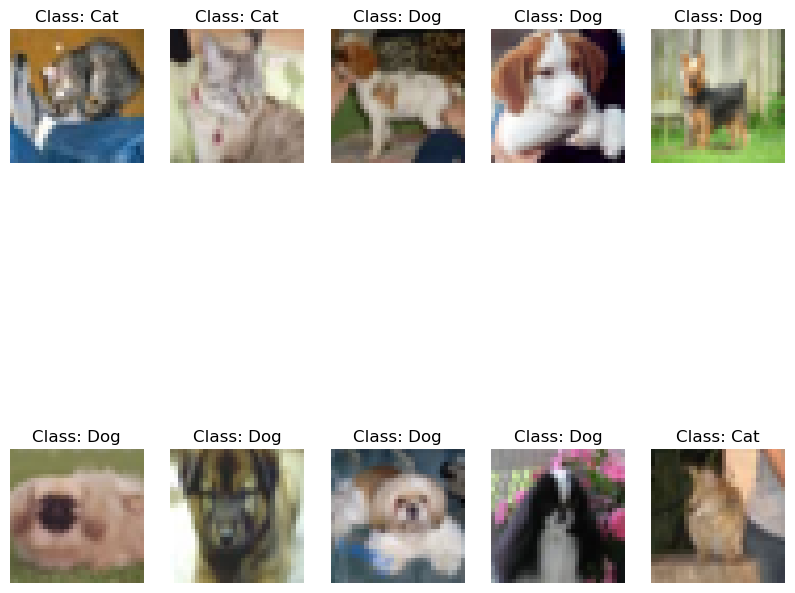

In [16]:
# Displaying some images from the test set with their predicted classes
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(f'Class: {"Dog" if true_classes[i] == 1 else "Cat"}')
    plt.axis('off')
plt.show()

# Saving the model
model.save("trained_model.hdf5")
